In [8]:
# importa biblioteca
import leafmap
import rasterio
import rioxarray
import xarray as xr

# nome do arquivo netcdf
filename = 'S10635346_202405020300.nc'

# plota mapa
Map = leafmap.Map()

Map.add_netcdf(f'input/{filename}',
               variables=["Band1"],
               palette="coolwarm",
               shift_lon=True,
               layer_name="Band1",
               indexes=[1])

shp_estados_brasil = 'https://github.com/codeforgermany/click_that_hood/blob/main/public/data/brazil-states.geojson'
Map.add_geojson(shp_estados_brasil, layer_name="Estados do Brasil")

Map

FileNotFoundError: input/S10635346_202405020300.nc does not exist.

In [9]:
def download_goes16_cptec(url, filename):
    import requests
    import warnings
    warnings.filterwarnings("ignore")

    url_filename = f'{url}{filename}'

    myfile = requests.get(url_filename, verify=False)
    open(f'{filename}', 'wb').write(myfile.content)

    return

In [10]:
url = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/'
filename = 'MERGE_CPTEC_acum_dec_2023.nc'
download_goes16_cptec(url, filename)

In [11]:
import xarray as xr
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 3MB
Dimensions:  (lon: 551, lat: 691, time: 1)
Coordinates:
  * lon      (lon) float64 4kB -85.05 -84.95 -84.85 ... -30.25 -30.15 -30.05
  * lat      (lat) float64 6kB -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 8B 2023-12-01T12:00:00
Data variables:
    pacum    (time, lat, lon) float64 3MB ...

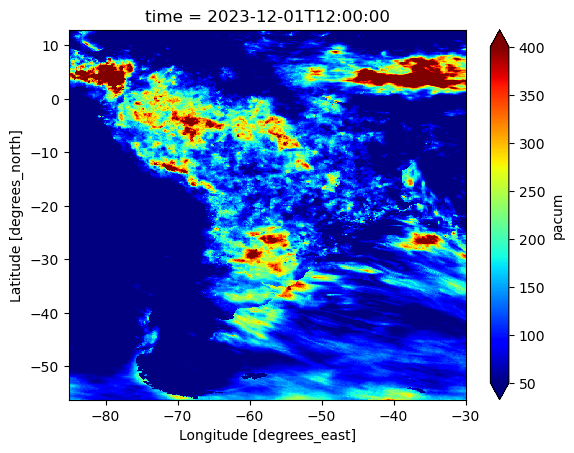

In [13]:
ds['pacum'].plot(vmin=50, vmax=400, cmap='jet')

Conhecendo os dados


In [ ]:
import xarray as xr
radar = xr.open_dataset('input/chuva_natal_201406.nc')
radar

In [ ]:
print(float(radar['precipitacao'].min()), float(radar['precipitacao'].max()))

In [ ]:
radar['precipitacao'].plot(cmap='jet', vmin=50)

In [ ]:
# importa biblioteca
import leafmap
import rasterio
import rioxarray
import xarray as xr

# nome do arquivo netcdf
filename = 'chuva_natal_201406-8.nc'

# plota mapa
vmin, vmax = 50, 400
Map = leafmap.Map(layers_control=True, width=700, height=700, zoom=12)
Map.add_netcdf(f'input/{filename}',
               variables=["precipitacao"],
               shift_lon=False,
               layer_name="precipitacao",
               indexes=[1],
               vmin=vmin,
               vmax=vmax,
               nodata=0.0,
               palette='jet')

# barra de cores
Map.add_colormap(cmap='jet',
                 vmin=vmin, 
                 vmax=vmax,
                 discrete=True, 
                 label='Precipitação (mm)',
                 font_size=8,
                 transparent_bg=True, 
                 position='bottomright',
                 width=3, height=0.4)

# shapefile
shp_estados_brasil = 'https://github.com/codeforgermany/click_that_hood/blob/main/public/data/brazil-states.geojson'
Map.add_geojson(shp_estados_brasil, layer_name="Estados do Brasil")

# exibe o mapa
Map